In [37]:
import pandas as pd

taxi_owners = pd.read_pickle('taxi_owners.p')
taxi_veh = pd.read_pickle('taxi_vehicles.p')

# Merge the datasets
taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid', suffixes=('_own', '_veh'))


# Print the value counts of fuel_type
print(taxi_own_veh['fuel_type'].value_counts())

fuel_type
HYBRID                    2792
GASOLINE                   611
FLEX FUEL                   89
COMPRESSED NATURAL GAS      27
Name: count, dtype: int64


In [38]:
wards_altered = pd.read_csv('Wards_Offices_Altered.csv')
census = pd.read_pickle('census.p')

# Convert ward to int to ensure they match
census['ward'] = census['ward'].astype(int)

# Merge the datasets
wards_census_altered = wards_altered.merge(census, on='ward')

# Print the number of rows
print('Number of rows:', wards_census_altered.shape[0])

Number of rows: 46


In [39]:
licenses = pd.read_pickle('licenses.p')
biz_owners = pd.read_pickle('business_owners.p')

# Merge the datasets
licenses_owners = licenses.merge(biz_owners, on='account')

# Group by title and count accounts
counted_df = licenses_owners.groupby('title').agg({'account':'count'})

# Sort by account count in descending order
sorted_df = counted_df.sort_values('account', ascending=False)

# Print the first few rows
print(sorted_df.head())

                 account
title                   
PRESIDENT           6259
SECRETARY           5205
SOLE PROPRIETOR     1658
OTHER               1200
VICE PRESIDENT       970


In [40]:
cal = pd.read_pickle('cta_calendar.p')
ridership = pd.read_pickle('cta_ridership.p')
stations = pd.read_pickle('stations.p')

# Merge the ridership and cal tables
ridership_cal = ridership.merge(cal, on=['year', 'month', 'day'])

# Merge the stations table
ridership_cal_stations = ridership_cal.merge(stations, on='station_id')

# Create the filter criteria
filter_criteria = ((ridership_cal_stations['month'] == 7) & 
                   (ridership_cal_stations['day_type'] == 'Weekday') & 
                   (ridership_cal_stations['station_name'] == 'Wilson'))

# Sum the rides column
print(ridership_cal_stations.loc[filter_criteria, 'rides'].sum())

140005


In [41]:
licenses = pd.read_pickle('licenses.p')
wards = pd.read_pickle('ward.p')
zip_demo = pd.read_pickle('zip_demo.p')

# Merge licenses and zip_demo
licenses_zip = licenses.merge(zip_demo, on='zip')

# Merge with wards
licenses_zip_ward = licenses_zip.merge(wards, on='ward')

# Group by alderman and find median income
alderman_median_income = licenses_zip_ward.groupby('alderman').agg({'income':'median'})

# Print the result
print(alderman_median_income.head())

                         income
alderman                       
Ameya Pawar             66246.0
Anthony A. Beale        38206.0
Anthony V. Napolitano   82226.0
Ariel E. Reyboras       41307.0
Brendan Reilly         110215.0


In [42]:
movies = pd.read_pickle('movies.p')
financials = pd.read_pickle('financials.p')

# Merge the movies table with the financials table with a left join
movies_financials = movies.merge(financials, on='id', how='left')

# Count the number of rows in the budget column that are missing
number_of_missing_fin = movies_financials['budget'].isnull().sum()

# Print the result
print(number_of_missing_fin)

1574


In [43]:
toy_story = pd.read_csv('toy_story.csv')
taglines = pd.read_pickle('taglines.p')

# Left join
toystory_tag = toy_story.merge(taglines, on='id', how='left')
print("Left Join Result:")
print(toystory_tag)
print("Type:", type(toystory_tag))

# Inner join
toystory_tag = toy_story.merge(taglines, on='id', how='inner')
print("\nInner Join Result:")
print(toystory_tag)
print("Type:", type(toystory_tag))

Left Join Result:
      id        title  popularity release_date                   tagline
0  10193  Toy Story 3      59.995    16/6/2010  No toy gets left behind.
1    863  Toy Story 2      73.575   30/10/1999        The toys are back!
2    862    Toy Story      73.640   30/10/1995                       NaN
Type: <class 'pandas.core.frame.DataFrame'>

Inner Join Result:
      id        title  popularity release_date                   tagline
0  10193  Toy Story 3      59.995    16/6/2010  No toy gets left behind.
1    863  Toy Story 2      73.575   30/10/1999        The toys are back!
Type: <class 'pandas.core.frame.DataFrame'>


In [44]:
movies = pd.read_pickle('movies.p')
movie_to_genres = pd.read_csv('tdmb_movie_to_genres.csv')

# Filter for Science Fiction movies
m = movie_to_genres['genre'] == 'Science Fiction'
scifi_movies = movie_to_genres[m]

# Filter for Action movies
m = movie_to_genres['genre'] == 'Action'
action_movies = movie_to_genres[m]

# Merge action_movies and scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right', suffixes=('_act', '_sci'))

# Subset rows where genre_act is null
scifi_only = action_scifi[action_scifi['genre_act'].isnull()]

# Merge movies and scifi_only
movies_scifi_only = movies.merge(scifi_only, left_on='id', right_on='movie_id', how='inner')

# Print the first few rows and shape
print(movies_scifi_only.head())
print(movies_scifi_only.shape)

      id                         title  popularity release_date  movie_id  \
0  18841  The Lost Skeleton of Cadavra    1.680525   2001-09-12     18841   
1  26672     The Thief and the Cobbler    2.439184   1993-09-23     26672   
2  15301      Twilight Zone: The Movie   12.902975   1983-06-24     15301   
3   8452                   The 6th Day   18.447479   2000-11-17      8452   
4   1649    Bill & Ted's Bogus Journey   11.349664   1991-07-19      1649   

  genre_act        genre_sci  
0       NaN  Science Fiction  
1       NaN  Science Fiction  
2       NaN  Science Fiction  
3       NaN  Science Fiction  
4       NaN  Science Fiction  
(258, 7)


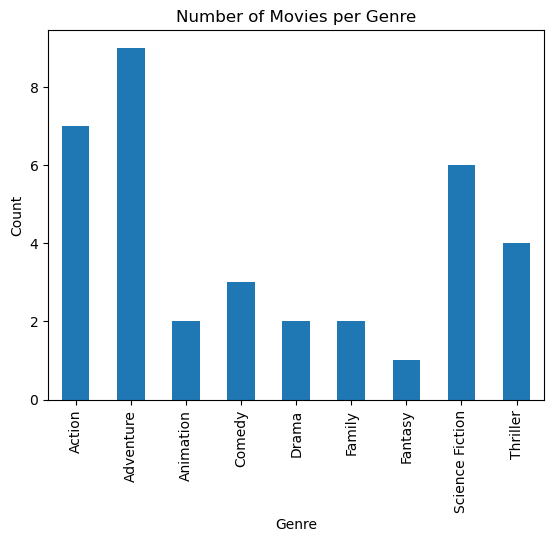

In [45]:
import matplotlib.pyplot as plt

pop_movies = pd.read_csv('pop_movies.csv')
movie_to_genres = pd.read_csv('tdmb_movie_to_genres.csv')

# Merge movie_to_genres and pop_movies using a right join
# movie_to_genres has 'movie_id', pop_movies has 'id'
genres_movies = movie_to_genres.merge(pop_movies, how='right', left_on='movie_id', right_on='id')

# Group by genre and count the number of id values
genre_counts = genres_movies.groupby('genre')['id'].count()

# Plot the bar chart
genre_counts.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Number of Movies per Genre')
plt.show()

In [46]:
crews = pd.read_pickle('crews.p')

# Merge the crews table to itself
crews_self_merged = crews.merge(crews, on='id', how='inner', suffixes=('_dir', '_crew'))

# Create a Boolean filter to select rows with the job of 'Director' in the left table
# and avoid rows with the job of 'Director' in the right table
boolean_filter = ((crews_self_merged['job_dir'] == 'Director') & 
                  (crews_self_merged['job_crew'] != 'Director'))

# Apply the filter to the merged table
direct_crews = crews_self_merged[boolean_filter]

# Print the first few rows
print(direct_crews.head())

        id department_dir   job_dir       name_dir department_crew  \
156  19995      Directing  Director  James Cameron         Editing   
157  19995      Directing  Director  James Cameron           Sound   
158  19995      Directing  Director  James Cameron      Production   
160  19995      Directing  Director  James Cameron         Writing   
161  19995      Directing  Director  James Cameron             Art   

           job_crew          name_crew  
156          Editor  Stephen E. Rivkin  
157  Sound Designer  Christopher Boyes  
158         Casting          Mali Finn  
160          Writer      James Cameron  
161    Set Designer    Richard F. Mays  


In [47]:
tracks_master = pd.read_csv('tracks_master.csv')
tracks_ride = pd.read_csv('tracks_ride.csv')
tracks_st = pd.read_csv('tracks_st.csv')

# Concatenate with sort=True
tracks_from_all_1 = pd.concat([tracks_master, tracks_ride, tracks_st], sort=True)
print("Concatenated with sort=True:")
print(tracks_from_all_1.head())

# Concatenate with ignore_index=True
tracks_from_all_2 = pd.concat([tracks_master, tracks_ride, tracks_st], ignore_index=True, sort=True)
print("\nConcatenated with ignore_index=True:")
print(tracks_from_all_2.head())

# Concatenate with join='inner'
tracks_from_all_3 = pd.concat([tracks_master, tracks_ride, tracks_st], join='inner', sort=True)
print("\nConcatenated with join='inner':")
print(tracks_from_all_3.head())

Concatenated with sort=True:
   aid             composer  gid  mtid                  name   tid  u_price
0  152  J.Hetfield/L.Ulrich    3     1               Battery  1853     0.99
1  152            K.Hammett    3     1     Master Of Puppets  1854     0.99
2  152  J.Hetfield/L.Ulrich    3     1     Disposable Heroes  1857     0.99
0  154                  NaN    3     1  Fight Fire With Fire  1874     0.99
1  154                  NaN    3     1    Ride The Lightning  1875     0.99

Concatenated with ignore_index=True:
   aid             composer  gid  mtid                  name   tid  u_price
0  152  J.Hetfield/L.Ulrich    3     1               Battery  1853     0.99
1  152            K.Hammett    3     1     Master Of Puppets  1854     0.99
2  152  J.Hetfield/L.Ulrich    3     1     Disposable Heroes  1857     0.99
3  154                  NaN    3     1  Fight Fire With Fire  1874     0.99
4  154                  NaN    3     1    Ride The Lightning  1875     0.99

Concatenated with jo

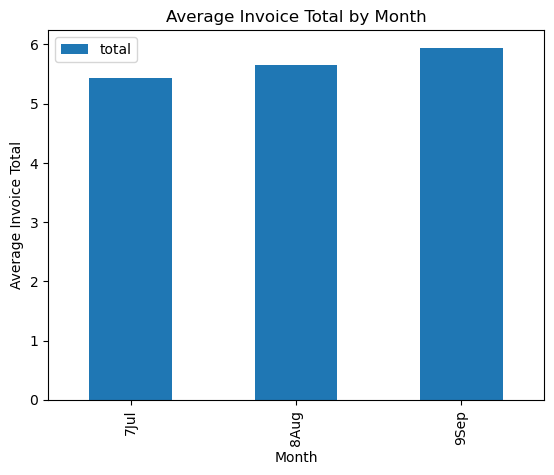

In [ ]:
inv_jul = pd.read_csv('inv_jul.csv')
inv_aug = pd.read_csv('inv_aug.csv')
inv_sep = pd.read_csv('inv_sep.csv')

# Concatenate the tables with keys
inv_all = pd.concat([inv_jul, inv_aug, inv_sep], keys=['7Jul', '8Aug', '9Sep'])

# Group by the index keys (level=0) and find the average of the total column
avg_inv_by_month = inv_all.groupby(level=0).agg({'total':'mean'})

# Create a bar chart
avg_inv_by_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Invoice Total')
plt.title('Average Invoice Total by Month')
plt.show()

In [49]:
sp500 = pd.read_csv('S&P500.csv')
gdp = pd.read_csv('GDP.csv')

# Step 1: Use merge_ordered() to merge gdp and sp500 using a left join on year and date. 
# Save the results as gdp_sp500. Print gdp_sp500 and look at the returns for the year 2018.
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='year', right_on='date', how='left')
print(gdp_sp500)
print(gdp_sp500[gdp_sp500['year'] == 2018])

# Step 2: Use merge_ordered(), again similar to before, to merge gdp and sp500 use the function's ability to interpolate missing data to forward fill the missing value for returns, assigning this table to the variable gdp_sp500.
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='year', right_on='date', how='left', fill_method='ffill')

# Step 3: Subset the gdp_sp500 table, select the gdp and returns columns, and save as gdp_returns. 
# Print the correlation matrix of the gdp_returns table using the .corr() method.
gdp_returns = gdp_sp500[['gdp', 'returns']]
print(gdp_returns.corr())

   Unnamed: 0 country code  year           gdp    date  returns
0           3          USA  2010  1.500000e+13  2010.0    12.78
1           7          USA  2011  1.550000e+13  2011.0     0.00
2          11          USA  2012  1.620000e+13  2012.0    13.41
3          15          USA  2012  1.620000e+13  2012.0    13.41
4          19          USA  2013  1.680000e+13  2013.0    29.60
5          23          USA  2014  1.750000e+13  2014.0    11.39
6          27          USA  2015  1.820000e+13  2015.0    -0.73
7          31          USA  2016  1.870000e+13  2016.0     9.54
8          35          USA  2017  1.950000e+13  2017.0    19.42
9          39          USA  2018  2.050000e+13     NaN      NaN
   Unnamed: 0 country code  year           gdp  date  returns
9          39          USA  2018  2.050000e+13   NaN      NaN
              gdp   returns
gdp      1.000000  0.220321
returns  0.220321  1.000000


       date      cpi     seriesid                  data_type  \
0  1/1/2014  235.288  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
1  1/1/2015  234.718  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
2  1/1/2016  237.833  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
3  1/1/2017  243.780  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
4  1/1/2018  248.884  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
5  1/6/2014  237.231  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
6  1/6/2015  237.684  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
7  1/6/2016  240.167  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
8  1/6/2017  244.182  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
9  1/6/2018  251.134  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   

   unemployment_rate  
0                6.7  
1                5.6  
2                5.0  
3                4.7  
4                4.1  
5                6.1  
6                5.3  
7                4.9  
8                4.3  
9                4.0  


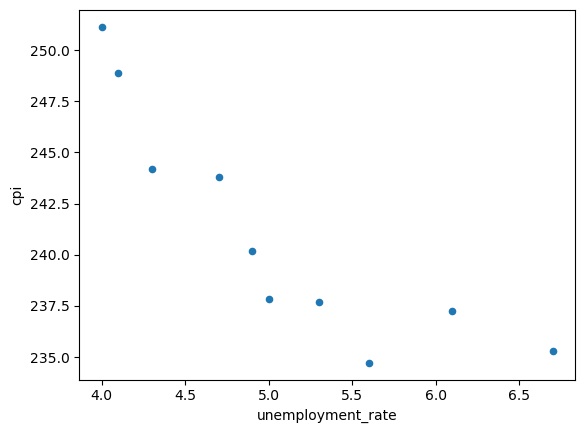

                   unemployment_rate       cpi
unemployment_rate           1.000000 -0.868388
cpi                        -0.868388  1.000000


: 

In [ ]:
unemployment = pd.read_csv('unemployment.csv')
inflation = pd.read_csv('inflation.csv')

# Merge inflation and unemployment tables on date with an inner join
inflation_unemploy = pd.merge_ordered(inflation, unemployment, on='date', how='inner')

# Print the inflation_unemploy variable
print(inflation_unemploy)

# Create a scatter plot with unemployment_rate on the horizontal axis and cpi (inflation) on the vertical axis
inflation_unemploy.plot(kind='scatter', x='unemployment_rate', y='cpi')
plt.show()

# Find correlation between unemployment_rate and cpi
print(inflation_unemploy[['unemployment_rate', 'cpi']].corr())